# IMT 573 - Lab 2 - Data Visualization

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

Name: Steve Gonzales

Collaborators: None

In this lab, we will look at data on the sinking of the RMS Titanic in the North Atlantic Ocean on the early morning of April 15, 1912. The data can be loaded as part of the `seaborn` package, which is imported below. `pyplot` is also imported below in case you need added functionality. You may need to install the packages if you're getting an error when importing.

Once the package is imported, the data is available by calling `sns.load_dataset("titanic")`, (note how `sns` refers to the variable from `import`). Store the data in your variable of choice.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import List
import math

In [88]:
df_titanic = sns.load_dataset("titanic")

For this lab, we will be exploring two primary questions:

- Who were the Titanic passengers and what charactersitics did they have?
- What passenger characteristics or other factors seem to be associated with survival?

Your task will be to create visualizations to better explore each of these questions.

### Problem 1: Who were the Titanic passengers?

Let's take a look at the titanic passengers in terms of their age and recorded gender (labelled "sex" in the dataset). To examine this, create a violin plot visualization that shows a histogram of ages for each sex, broken down by whether the passenger survived. You can read more on violin plots [here](https://seaborn.pydata.org/generated/seaborn.violinplot.html). An example of what your visualization may look like can be found [here](https://drive.google.com/file/d/1aunGBuEso3zpn4QOb688WQD5Quqtzy_s/view?usp=drive_link).

For your visualization:
- change the color of the histograms from the default colors
- add gridlines across whichever axis shows age (hint: use the `set_style()` function to help with this. For more, see [here](https://seaborn.pydata.org/generated/seaborn.set_style.html).
- add axis labels and a title

### Problem 2: A visualization of your own

Now, create a visualization of your own that shows relationships between passenger characteristics and survival. You must:
- create a visualization other than a violin visualization
- use (at least) two variables other than survival in your visualization
- appropriately label the axes and add a title

After creating your visualization, provide a paragraph describing what the visualization shows.

Have fun and be creative!

# 1.0.2  Problem 1: Who were the Titanic passengers?

In [89]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: title={'center': 'Violin Plot of Titanic Passenger Characteristic'}, xlabel='age', ylabel='sex'>

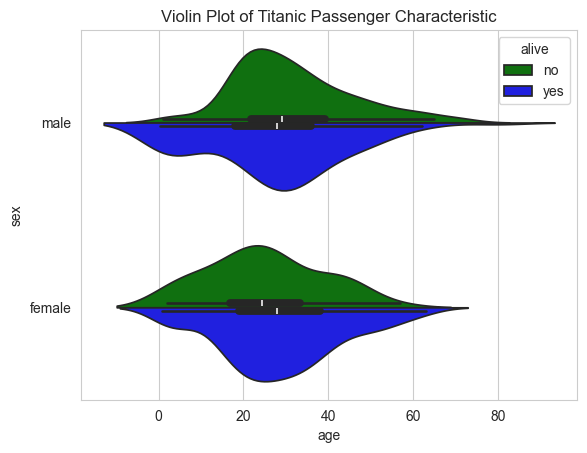

In [90]:
sns.set_style("whitegrid")
plt.title('Violin Plot of Titanic Passenger Characteristic')
sns.violinplot(x=df_titanic["age"], y=df_titanic["sex"], hue=df_titanic["alive"], split=True, palette=['g','b'])

# 1.0.3  Problem 2: A visualization of your own

In [91]:
df_titanic_my = df_titanic.copy()
# Need to filter out any passenger without age, as that is a required field in my analysis
df_titanic_2 = df_titanic[df_titanic['age'].notna()].copy() 
print(f'Total rows in data set={len(df_titanic)}. NaN ages number of rows={len(df_titanic)-len(df_titanic_2)}')

Total rows in data set=891. NaN ages number of rows=177


In [2]:
# Pandas simply will not produce correct results for pd.cut(series, bins, **right=False**) 
#  and, once again, uses some overly complex Interval data type that makes is unusable except for the people who wrote it.
# Creating my own binning function so that I can bin passengers by age properly.

def create_bins(lst: List[float], bins: List[float], labels='left') -> List[str]:
    if lst:
        inf_bins = [-math.inf] + bins + [math.inf] 
        out_lst, left_bin, right_bin = [], -math.inf, math.inf
        for item in lst:
            for i in range(0, len(inf_bins)-1):
                left_bin, right_bin = inf_bins[i], inf_bins[i+1]
                if labels == 'both':
                    left_bin_label, right_bin_label = str(inf_bins[i]), str(inf_bins[i+1])
                else:
                    left_bin_label, right_bin_label = inf_bins[i], inf_bins[i+1]
                # print(out_lst, item, left_bin, right_bin)
                if left_bin < item <= right_bin:
                    if left_bin == -math.inf:
                        out_lst.append(right_bin_label)
                    elif right_bin == math.inf:
                        out_lst.append(left_bin_label)
                    elif labels == 'left':
                        out_lst.append(left_bin_label)
                    elif labels == 'right':
                        out_lst.append(right_bin_label)
                    elif labels == 'both':
                        out_lst.append(f'{left_bin}-{right_bin}')
                    break
                else:
                    left_bin = right_bin
        return out_lst
age_bins = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80]
print(create_bins([2,6,11,21,31,41,51,82], [1, 5, 10, 20, 30, 40, 50, 81], 'both'))
assert create_bins([1, 6, 6, 6, 6, 55], age_bins) == [1, 5, 5, 5, 5, 50]
assert create_bins([2], age_bins) == [1]
assert create_bins([999], age_bins) == [80]
assert create_bins([-100, 99, 44, 1, 6, 6, 6, 6, 55], age_bins, 'both') == ['1', '80', '40-50', '1', '5-10', '5-10', '5-10', '5-10', '50-60']

['1-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50-81', '81']


In [93]:
# Add age bins using the custom function to the DF
age_bins = [1, 5, 10, 20, 30, 40, 50, 81]
age_bin_labels = ['1-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50-81', '81']
df_titanic_2['age_bin'] = create_bins(df_titanic_2['age'].tolist(), age_bins, 'both')
df_titanic_2['age_bin_left'] = create_bins(df_titanic_2['age'].tolist(), age_bins)
display(df_titanic_2)
print(sorted(list(set(df_titanic_2['age_bin_left'].tolist()))))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin,age_bin_left
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20-30,20
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30-40,30
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20-30,20
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30-40,30
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30-40,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,30-40,30
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,20-30,20
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,10-20,10
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,20-30,20


[1, 5, 10, 20, 30, 40, 50]


In [94]:
# I was running into a problem with the scatter plot and had to examine the data
print(df_titanic_2['age_bin_left'].unique())
display(age_counts_alive)
display(age_counts_df)
print(age_counts_df.index)

[20 30 50  1 10  5 40]


age_bin_left
1     15
5      4
10    10
20    23
30    23
40    12
50     6
Name: age, dtype: int64

,alive,dead
age_bin_left,,
1,15,8
5,4,6
10,10,59
20,23,126
30,23,77
40,12,43
50,6,41


Index([1, 5, 10, 20, 30, 40, 50], dtype='int64', name='age_bin_left')


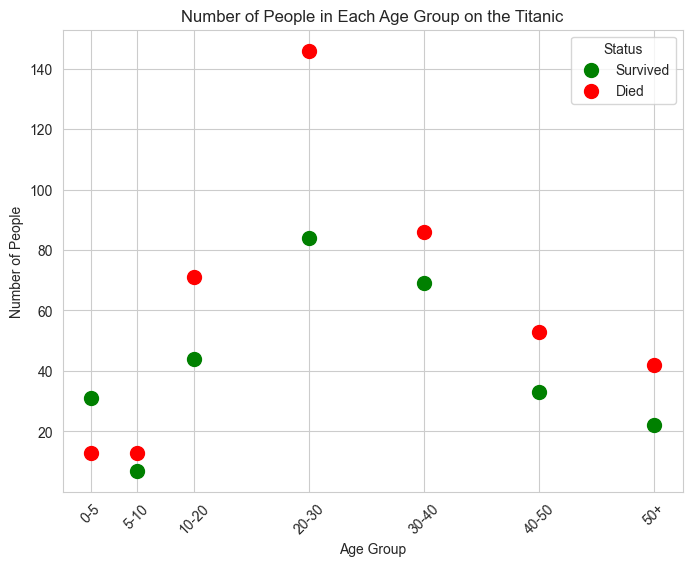

This should not be the only way to look at the data, e.g. Some might argue a Bar Chart is better suited. 
However, we clearly see that infants had a lower mortality rate than toddlers; 
this is likely due to their parents holding them or keeping them close.
While those in their 20's survived at much lower rates; probably due to them helping out with the rescue efforts.


In [95]:
# Total number of passengers by outcome, binned by age
age_counts_alive = df_titanic_2[df_titanic_2['alive'] == 'yes'].groupby('age_bin_left', observed=True)['age'].count()
age_counts_dead = df_titanic_2[df_titanic_2['alive'] == 'no'].groupby('age_bin_left', observed=True)['age'].count()
age_counts_df = pd.DataFrame({'alive': age_counts_alive, 'dead': age_counts_dead})
plt.figure(figsize=(8, 6))
plt.scatter(age_counts_df.index, age_counts_df['alive'], c='green', s=100, label='Alive') 
plt.scatter(age_counts_df.index, age_counts_df['dead'], c='red', s=100, label='Dead') 
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.title("Number of People in Each Age Group on the Titanic")
plt.xticks(rotation=45)
plt.xticks([1, 5, 10, 20, 30, 40, 50], ['0-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50+'])
# Ran into a problem and had to try out different methods
# plt.xticks([1, 5, 10, 20, 30, 40, 50], ['0-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50+'])
# plt.xticks([1, 5, 10, 20, 30, 40, 50], [1, 5, 10, 20, 30, 40, 50])
# plt.xticks(x_values_np, x_labels_np)
plt.grid(True)
plt.legend(title="Status", labels=["Survived", "Died"])
plt.show()
print("""This should not be the only way to look at the data, e.g. Some might argue a Bar Chart is better suited. 
However, we clearly see that infants had a lower mortality rate than toddlers; 
this is likely due to their parents holding them or keeping them close.
While those in their 20's survived at much lower rates; probably due to them helping out with the rescue efforts.""")

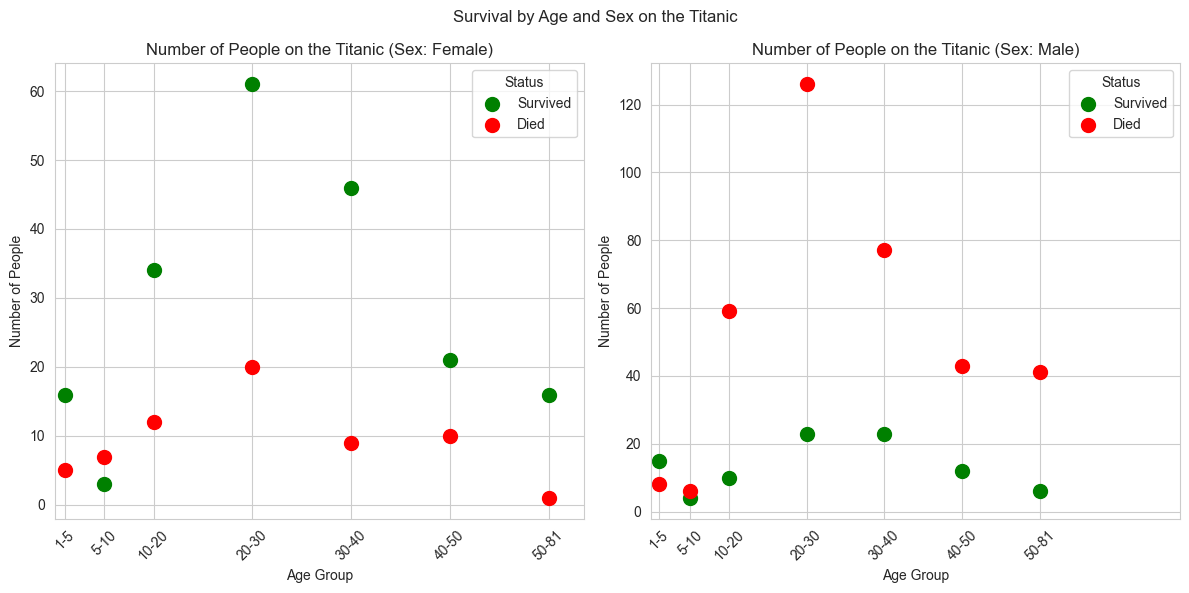

When we present the data split out by Sex, the story changes dramatically:
Far more men died than women. Maybe because they were the ones enlisted to help 
and there were historical accounts of the crew saying 'women and children first'.


In [96]:
# Passenger mortality binned by age, separate charts by Sex
age_bins = [1, 5, 10, 20, 30, 40, 50, 81]
age_bin_labels = ['1-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50-81', '81']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax_n = 0
for sex in ['female', 'male']:
    df = df_titanic[df_titanic['age'].notna()].copy()
    df = df[df['sex'] == sex]
    df['age_bin'] = create_bins(df['age'].tolist(), age_bins, 'both')
    df['age_bin_left'] = create_bins(df['age'].tolist(), age_bins)
    age_counts_alive = df[df['alive'] == 'yes'].groupby('age_bin_left', observed=True)['age'].count()
    age_counts_dead = df[df['alive'] == 'no'].groupby('age_bin_left', observed=True)['age'].count()
    age_counts_df = pd.DataFrame({'alive': age_counts_alive, 'dead': age_counts_dead})
    axes[ax_n].scatter(age_counts_df.index, age_counts_df['alive'], c='green', s=100, label='Alive')
    axes[ax_n].scatter(age_counts_df.index, age_counts_df['dead'], c='red', s=100, label='Dead')
    axes[ax_n].set_xticks(age_bins) 
    axes[ax_n].set_xticklabels(age_bin_labels, rotation=45)
    axes[ax_n].set_xlabel("Age Group")
    axes[ax_n].set_ylabel("Number of People")
    axes[ax_n].set_title(f"Number of People on the Titanic (Sex: {sex.capitalize()})")
    axes[ax_n].grid(True)
    axes[ax_n].legend(title="Status", labels=["Survived", "Died"])
    axes[ax_n].set_xlim(0, df['age'].max()*.85)
    ax_n += 1
fig.suptitle('Survival by Age and Sex on the Titanic')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3)
plt.tight_layout()
plt.show()
print("""When we present the data split out by Sex, the story changes dramatically:
Far more men died than women. Maybe because they were the ones enlisted to help 
and there were historical accounts of the crew saying 'women and children first'.""")
# I think there is a defect in MatplotLib where it does not recognize the x limit under certain circumstances.
# You can see too much white space in the right chart. I tried numerous things to remove it, but could not.

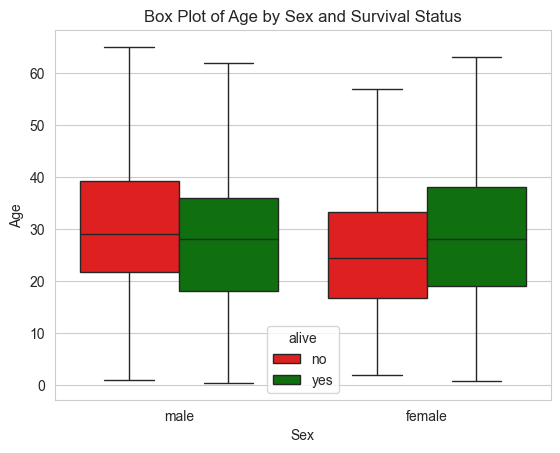

This plot shows ages and sex of all the passengers, separated out by whether they lived or not. 
Right off the bat we can see that the mean age survivor depended on your sex: older women survived at greater 


In [97]:
# Using a box plot to show age and sec by Survival status
sns.boxplot(x="sex", y="age", hue="alive", data=df_titanic_my, palette={"yes": "green", "no": "red"}, showfliers=False)
plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("Box Plot of Age by Sex and Survival Status")
plt.show()
print("""This plot shows ages and sex of all the passengers, separated out by whether they lived or not. 
Right off the bat we can see that the mean age survivor depended on your sex: older women survived at greater """)

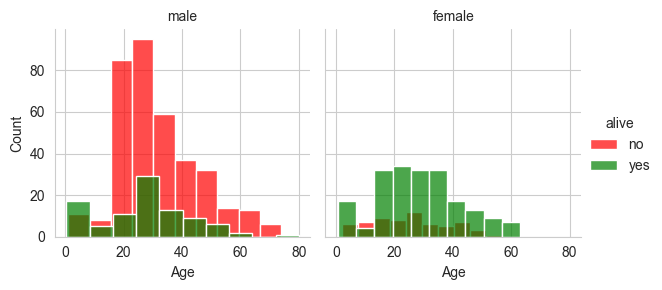

We see that many more young men perished compared to older men, while the opposite was true for women
About an equal number of infants of both sexes survived


In [98]:
# Create a Seaborn FacetGrid plot
fg = sns.FacetGrid(df_titanic_my, col="sex", hue="alive", palette={"yes": "green", "no": "red"})
# There are two plots, so "map" bins and alpha (transparency) to age in each plot
fg.map(sns.histplot, "age", bins=10, alpha=0.7) 

# Add labels and title
fg.set_titles(col_template="{col_name}")
fg.set_xlabels("Age")
fg.set_ylabels("Count")
fg.add_legend()
plt.show()
print("""We see that many more young men perished compared to older men, while the opposite was true for women
About an equal number of infants of both sexes survived""")